# Import Packages

In [1]:
import sys

sys.path.append('../')

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from datasets import load_data

# Experiment

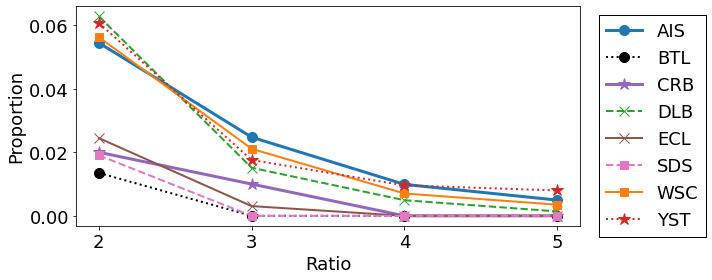

In [8]:
fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
data_name_list = ['AIS', 'wisconsin', 'DLBCL', 'yeast', 'crabs', 'ecoli', 'seeds', 'beetles']
data_abb_list = ['AIS', 'WSC', 'DLB', 'YST', 'CRB', 'ECL', 'SDS', 'BTL']
color_list = ['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'black']
width_list = [3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0]
style_list = ['solid', 'solid', 'dashed', 'dotted', 'solid', 'solid', 'dashed', 'dotted']
marker_list = ['o', 's', 'x', '*', '*', 'x', 's', 'o']
markersize_list = [10, 8, 10, 13, 13, 10, 8, 10]

permutation = [0, 7, 4, 2, 5, 6, 1, 3]

for i in permutation:
    X, Z_true = load_data(data_name_list[i], scaling=True)
    kn = KNeighborsClassifier(n_neighbors=5)
    kn.fit(X, Z_true)
    dist = kn.kneighbors(X)
    dists = dist[0][:, -1]
    outliers = [np.sum(dists / np.mean(dists) > k) / len(X) for k in [2.0, 3.0, 4.0, 5.0]]
    ax.plot(
        [2.0, 3.0, 4.0, 5.0],
        outliers,
        color=color_list[i],
        label=data_abb_list[i],
        linewidth=width_list[i],
        linestyle=style_list[i],
        marker=marker_list[i],
        markersize=markersize_list[i]
    )

ax.legend(
    bbox_to_anchor=(1.02, 1.0),
    loc='upper left', 
    fontsize=18,
    fancybox=False,
    framealpha=1.0,
    edgecolor='black'
)
ax.tick_params(labelsize=18)
ax.set_xticks([2.0, 3.0, 4.0, 5.0])
ax.set_xlabel('Ratio', fontsize=18)
ax.set_ylabel('Proportion', fontsize=18)